/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


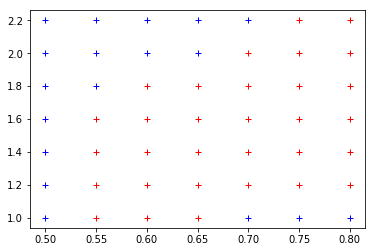

Run time 00:03:38 CPU time 00:02:05


In [3]:
import bootstrap
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np

#Start timing
start_time=time.time()
start_cpu=time.clock()

#Parameters for SDPB
bootstrap.cutoff=1e-10
dim=3
k_max=7
l_max=15
n_max=4
m_max=2

#Initializing conformal and convolved conformal blocks
tab1=bootstrap.ConformalBlockTable(dim,k_max,l_max,m_max,n_max)
tab2=bootstrap.ConvolvedBlockTable(tab1)

#There is a problem with using arrays here
sig_set=np.arange(0.5,0.85,0.05)
eps_set=np.arange(1.0,2.2,0.2)
#Plots all allowed points in a coarse grid
def plot_grid(table,sig_range,eps_range):
    allowed_sig=[]
    allowed_eps=[]
    disallowed_sig=[]
    disallowed_eps=[]
    for sig in sig_set:
        for eps in eps_set:
            sdp=bootstrap.SDP(sig,table)
            sdp.set_bound(0,float(dim))
            sdp.add_point(0,eps)
            result=sdp.iterate()
            if result:
                allowed_sig.append(sig)
                allowed_eps.append(eps)
            else:
                disallowed_sig.append(sig)
                disallowed_eps.append(eps)
    plt.plot(allowed_sig,allowed_eps,'r+')
    plt.plot(disallowed_sig,disallowed_eps,'b+')
    plt.show()

#Example
plot_grid(tab2,sig_set,eps_set)

#Computing and formatting times (Can shorten this - use Jupyter!)
end_time=time.time()
end_cpu=time.clock()
run_time=end_time-start_time
cpu_time=end_cpu-start_cpu
run_time1=time.gmtime(run_time)
run_time2=time.strftime("%H:%M:%S",run_time1)
cpu_time1=time.gmtime(cpu_time)
cpu_time2=time.strftime("%H:%M:%S",cpu_time1)
print("Run time "+run_time2, "CPU time "+cpu_time2)